In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm
import itertools
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# Import time series

In [3]:
import pickle
with open('./data/melted_zip3.pickle', 'rb') as file:
    melted_zip3 = pickle.load(file)
    

# ARIMA Modeling

In [4]:
melted_zip3.head()

,value
time,
1996-04-01,45800.0
1996-05-01,46000.0
1996-06-01,46200.0
1996-07-01,46300.0
1996-08-01,46400.0


In [5]:
ts1 = melted_zip3['2010-01-01':]
ts1

,value
time,
2010-01-01,76900.0
2010-02-01,76700.0
2010-03-01,77000.0
2010-04-01,77100.0
2010-05-01,77500.0
...,...
2017-12-01,96400.0
2018-01-01,99000.0
2018-02-01,101700.0


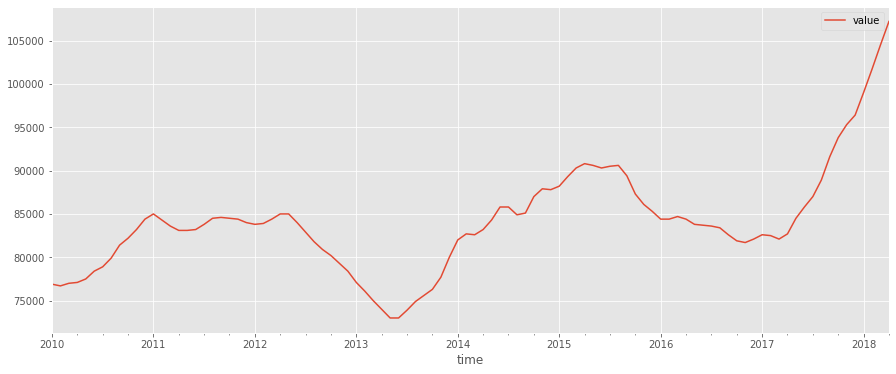

              value
time               
2010-01-01  76900.0
2010-02-01  76700.0
2010-03-01  77000.0
2010-04-01  77100.0
2010-05-01  77500.0


In [6]:
#ts1 = melted_zip3['value'].resample('MS').mean()
ts1 = ts1.fillna(ts1.bfill())
ts1.plot(figsize=(15,6))
plt.show()

print(ts1.head())

In [7]:
# from statsmodels.tsa.stattools import adfuller

# dftest = adfuller(ts1['value'])

# # Extract and display test results in a user friendly manner
# dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
# for key,value in dftest[4].items():
#     dfoutput['Critical Value (%s)'%key] = value

# print(dftest)

# print ('Results of Dickey-Fuller test: \n')

# print(dfoutput)

In [8]:
# # Difference the time series
# ts1_diff = ts1.diff().dropna()
# ts1_diff

In [9]:
# ts1_diff.plot(figsize=(15,6))
# plt.show()


In [10]:
warnings.filterwarnings('ignore')
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)  

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 1) for x in list(itertools.product(p, d, q))]

In [8]:
warnings.filterwarnings('ignore')
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts1,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue  

ARIMA (0, 0, 0) x (0, 0, 0, 1)12 : AIC Calculated =2528.957105545558
ARIMA (0, 0, 0) x (0, 0, 1, 1)12 : AIC Calculated =2435.249978758604
ARIMA (0, 0, 0) x (0, 0, 2, 1)12 : AIC Calculated =2363.1580715492223
ARIMA (0, 0, 0) x (0, 0, 3, 1)12 : AIC Calculated =2794.532818357726
ARIMA (0, 0, 0) x (0, 1, 0, 1)12 : AIC Calculated =1650.4188006060347
ARIMA (0, 0, 0) x (0, 1, 1, 1)12 : AIC Calculated =1549.9565263396053
ARIMA (0, 0, 0) x (0, 1, 2, 1)12 : AIC Calculated =1482.915576117392
ARIMA (0, 0, 0) x (0, 1, 3, 1)12 : AIC Calculated =1469.0890175578468
ARIMA (0, 0, 0) x (0, 2, 0, 1)12 : AIC Calculated =1525.8629351501036
ARIMA (0, 0, 0) x (0, 2, 1, 1)12 : AIC Calculated =1501.4437939047511
ARIMA (0, 0, 0) x (0, 2, 2, 1)12 : AIC Calculated =1476.056941652817
ARIMA (0, 0, 0) x (0, 2, 3, 1)12 : AIC Calculated =1455.969476592119
ARIMA (0, 0, 0) x (0, 3, 0, 1)12 : AIC Calculated =1913.0855007023763
ARIMA (0, 0, 0) x (0, 3, 1, 1)12 : AIC Calculated =1670.5341204066076
ARIMA (0, 0, 0) x (0, 3, 2

ARIMA (0, 0, 1) x (3, 1, 2, 1)12 : AIC Calculated =1472.7723012325691
ARIMA (0, 0, 1) x (3, 1, 3, 1)12 : AIC Calculated =1474.032600524661
ARIMA (0, 0, 1) x (3, 2, 0, 1)12 : AIC Calculated =1461.4928469195377
ARIMA (0, 0, 1) x (3, 2, 1, 1)12 : AIC Calculated =1463.8294092142382
ARIMA (0, 0, 1) x (3, 2, 2, 1)12 : AIC Calculated =1446.1883211262095
ARIMA (0, 0, 1) x (3, 2, 3, 1)12 : AIC Calculated =1438.2595256715608
ARIMA (0, 0, 1) x (3, 3, 0, 1)12 : AIC Calculated =1535.4455315327275
ARIMA (0, 0, 1) x (3, 3, 1, 1)12 : AIC Calculated =1475.2527573035395
ARIMA (0, 0, 1) x (3, 3, 2, 1)12 : AIC Calculated =1506.9373685613784
ARIMA (0, 0, 1) x (3, 3, 3, 1)12 : AIC Calculated =1492.0780449335803
ARIMA (0, 0, 2) x (0, 0, 0, 1)12 : AIC Calculated =2363.1580715492223
ARIMA (0, 0, 2) x (0, 0, 1, 1)12 : AIC Calculated =3066.791758845977
ARIMA (0, 0, 2) x (0, 0, 2, 1)12 : AIC Calculated =9503.766123811796
ARIMA (0, 0, 2) x (0, 0, 3, 1)12 : AIC Calculated =3939.1387982600554
ARIMA (0, 0, 2) x (0, 1

ARIMA (0, 0, 3) x (2, 3, 0, 1)12 : AIC Calculated =1476.8937240771704
ARIMA (0, 0, 3) x (2, 3, 1, 1)12 : AIC Calculated =1452.5387249798905
ARIMA (0, 0, 3) x (2, 3, 2, 1)12 : AIC Calculated =1461.9192765386185
ARIMA (0, 0, 3) x (2, 3, 3, 1)12 : AIC Calculated =1430.7406727864936
ARIMA (0, 0, 3) x (3, 0, 0, 1)12 : AIC Calculated =2369.6201044390923
ARIMA (0, 0, 3) x (3, 0, 1, 1)12 : AIC Calculated =2347.0825639578093
ARIMA (0, 0, 3) x (3, 0, 2, 1)12 : AIC Calculated =2324.544406860645
ARIMA (0, 0, 3) x (3, 0, 3, 1)12 : AIC Calculated =2302.0160932395693
ARIMA (0, 0, 3) x (3, 1, 0, 1)12 : AIC Calculated =1455.7522430240067
ARIMA (0, 0, 3) x (3, 1, 1, 1)12 : AIC Calculated =1481.470954698713
ARIMA (0, 0, 3) x (3, 1, 2, 1)12 : AIC Calculated =1468.6381996388302
ARIMA (0, 0, 3) x (3, 1, 3, 1)12 : AIC Calculated =1460.626933319853
ARIMA (0, 0, 3) x (3, 2, 0, 1)12 : AIC Calculated =1446.188321233714
ARIMA (0, 0, 3) x (3, 2, 1, 1)12 : AIC Calculated =1436.7002592228275
ARIMA (0, 0, 3) x (3, 2,

ARIMA (0, 1, 1) x (2, 0, 2, 1)12 : AIC Calculated =1473.7198466981736
ARIMA (0, 1, 1) x (2, 0, 3, 1)12 : AIC Calculated =1483.4732265812388
ARIMA (0, 1, 1) x (2, 1, 0, 1)12 : AIC Calculated =1473.894008509272
ARIMA (0, 1, 1) x (2, 1, 1, 1)12 : AIC Calculated =1461.4925070270106
ARIMA (0, 1, 1) x (2, 1, 2, 1)12 : AIC Calculated =1446.7580455127925
ARIMA (0, 1, 1) x (2, 1, 3, 1)12 : AIC Calculated =1434.316128812178
ARIMA (0, 1, 1) x (2, 2, 0, 1)12 : AIC Calculated =1503.6047399677657
ARIMA (0, 1, 1) x (2, 2, 1, 1)12 : AIC Calculated =1464.0112484971144
ARIMA (0, 1, 1) x (2, 2, 2, 1)12 : AIC Calculated =1449.7325549294808
ARIMA (0, 1, 1) x (2, 2, 3, 1)12 : AIC Calculated =1420.8415732733524
ARIMA (0, 1, 1) x (2, 3, 0, 1)12 : AIC Calculated =1553.9090247266588
ARIMA (0, 1, 1) x (2, 3, 1, 1)12 : AIC Calculated =1515.1750472936453
ARIMA (0, 1, 1) x (2, 3, 2, 1)12 : AIC Calculated =1495.0814801881122
ARIMA (0, 1, 1) x (2, 3, 3, 1)12 : AIC Calculated =1486.9311110216627
ARIMA (0, 1, 1) x (3, 

ARIMA (0, 1, 3) x (1, 2, 0, 1)12 : AIC Calculated =1450.150111760748
ARIMA (0, 1, 3) x (1, 2, 1, 1)12 : AIC Calculated =1424.378159015492
ARIMA (0, 1, 3) x (1, 2, 2, 1)12 : AIC Calculated =1404.793899905798
ARIMA (0, 1, 3) x (1, 2, 3, 1)12 : AIC Calculated =1384.5298269936293
ARIMA (0, 1, 3) x (1, 3, 0, 1)12 : AIC Calculated =1495.0087868842566
ARIMA (0, 1, 3) x (1, 3, 1, 1)12 : AIC Calculated =1455.4698624153725
ARIMA (0, 1, 3) x (1, 3, 2, 1)12 : AIC Calculated =1418.135755490986
ARIMA (0, 1, 3) x (1, 3, 3, 1)12 : AIC Calculated =1426.0026842548102
ARIMA (0, 1, 3) x (2, 0, 0, 1)12 : AIC Calculated =1457.4650169018498
ARIMA (0, 1, 3) x (2, 0, 1, 1)12 : AIC Calculated =1441.53556336902
ARIMA (0, 1, 3) x (2, 0, 2, 1)12 : AIC Calculated =1476.4307207966992
ARIMA (0, 1, 3) x (2, 0, 3, 1)12 : AIC Calculated =1459.0856242264847
ARIMA (0, 1, 3) x (2, 1, 0, 1)12 : AIC Calculated =1446.7580455783745
ARIMA (0, 1, 3) x (2, 1, 1, 1)12 : AIC Calculated =1434.3161303246748
ARIMA (0, 1, 3) x (2, 1, 2

ARIMA (0, 2, 1) x (0, 3, 2, 1)12 : AIC Calculated =1534.4764599777484
ARIMA (0, 2, 1) x (0, 3, 3, 1)12 : AIC Calculated =1509.288031514703
ARIMA (0, 2, 1) x (1, 0, 0, 1)12 : AIC Calculated =1500.7450305143143
ARIMA (0, 2, 1) x (1, 0, 1, 1)12 : AIC Calculated =1474.2570458906055
ARIMA (0, 2, 1) x (1, 0, 2, 1)12 : AIC Calculated =1458.1576402985197
ARIMA (0, 2, 1) x (1, 0, 3, 1)12 : AIC Calculated =1421.2610671216044
ARIMA (0, 2, 1) x (1, 1, 0, 1)12 : AIC Calculated =1526.4958660312304
ARIMA (0, 2, 1) x (1, 1, 1, 1)12 : AIC Calculated =1490.148571628729
ARIMA (0, 2, 1) x (1, 1, 2, 1)12 : AIC Calculated =1450.1501116898685
ARIMA (0, 2, 1) x (1, 1, 3, 1)12 : AIC Calculated =1424.3781594291472
ARIMA (0, 2, 1) x (1, 2, 0, 1)12 : AIC Calculated =1535.4921625984875
ARIMA (0, 2, 1) x (1, 2, 1, 1)12 : AIC Calculated =1529.8631097192683
ARIMA (0, 2, 1) x (1, 2, 2, 1)12 : AIC Calculated =1462.6935997041462
ARIMA (0, 2, 1) x (1, 2, 3, 1)12 : AIC Calculated =1432.7069336312131
ARIMA (0, 2, 1) x (1, 

ARIMA (0, 2, 3) x (0, 1, 0, 1)12 : AIC Calculated =1457.6612084237365
ARIMA (0, 2, 3) x (0, 1, 1, 1)12 : AIC Calculated =1422.7698403163888
ARIMA (0, 2, 3) x (0, 1, 2, 1)12 : AIC Calculated =1411.3308199803648
ARIMA (0, 2, 3) x (0, 1, 3, 1)12 : AIC Calculated =1401.8305385193005
ARIMA (0, 2, 3) x (0, 2, 0, 1)12 : AIC Calculated =1468.5957302582062
ARIMA (0, 2, 3) x (0, 2, 1, 1)12 : AIC Calculated =1443.6470003173456
ARIMA (0, 2, 3) x (0, 2, 2, 1)12 : AIC Calculated =1412.7985797153797
ARIMA (0, 2, 3) x (0, 2, 3, 1)12 : AIC Calculated =1395.1790819411876
ARIMA (0, 2, 3) x (0, 3, 0, 1)12 : AIC Calculated =1533.2892515384535
ARIMA (0, 2, 3) x (0, 3, 1, 1)12 : AIC Calculated =1509.288031517718
ARIMA (0, 2, 3) x (0, 3, 2, 1)12 : AIC Calculated =1472.1455904398542
ARIMA (0, 2, 3) x (0, 3, 3, 1)12 : AIC Calculated =1422.5312155753184
ARIMA (0, 2, 3) x (1, 0, 0, 1)12 : AIC Calculated =1457.5304889531003
ARIMA (0, 2, 3) x (1, 0, 1, 1)12 : AIC Calculated =1421.2610439210257
ARIMA (0, 2, 3) x (1,

ARIMA (0, 3, 0) x (3, 2, 2, 1)12 : AIC Calculated =1483.3292127010313
ARIMA (0, 3, 0) x (3, 2, 3, 1)12 : AIC Calculated =1451.566529879689
ARIMA (0, 3, 0) x (3, 3, 0, 1)12 : AIC Calculated =1581.1376345701074
ARIMA (0, 3, 0) x (3, 3, 1, 1)12 : AIC Calculated =1540.8639755759584
ARIMA (0, 3, 0) x (3, 3, 2, 1)12 : AIC Calculated =1518.336502566945
ARIMA (0, 3, 0) x (3, 3, 3, 1)12 : AIC Calculated =1490.3497176706076
ARIMA (0, 3, 1) x (0, 0, 0, 1)12 : AIC Calculated =1536.6276311991408
ARIMA (0, 3, 1) x (0, 0, 1, 1)12 : AIC Calculated =1520.4343506888815
ARIMA (0, 3, 1) x (0, 0, 2, 1)12 : AIC Calculated =1457.6612084243995
ARIMA (0, 3, 1) x (0, 0, 3, 1)12 : AIC Calculated =1422.7698402968515
ARIMA (0, 3, 1) x (0, 1, 0, 1)12 : AIC Calculated =1533.7717527824827
ARIMA (0, 3, 1) x (0, 1, 1, 1)12 : AIC Calculated =1544.6859130584762
ARIMA (0, 3, 1) x (0, 1, 2, 1)12 : AIC Calculated =1470.0248822289627
ARIMA (0, 3, 1) x (0, 1, 3, 1)12 : AIC Calculated =1443.4879639773944
ARIMA (0, 3, 1) x (0, 

ARIMA (0, 3, 2) x (3, 0, 0, 1)12 : AIC Calculated =1463.0301736399479
ARIMA (0, 3, 2) x (3, 0, 1, 1)12 : AIC Calculated =1449.0137078323992
ARIMA (0, 3, 2) x (3, 0, 2, 1)12 : AIC Calculated =1422.2618818923675
ARIMA (0, 3, 2) x (3, 0, 3, 1)12 : AIC Calculated =1411.5763843853076
ARIMA (0, 3, 2) x (3, 1, 0, 1)12 : AIC Calculated =1494.6603080562898
ARIMA (0, 3, 2) x (3, 1, 1, 1)12 : AIC Calculated =1468.3422135761577
ARIMA (0, 3, 2) x (3, 1, 2, 1)12 : AIC Calculated =1430.7463485187552
ARIMA (0, 3, 2) x (3, 1, 3, 1)12 : AIC Calculated =1424.1628780730107
ARIMA (0, 3, 2) x (3, 2, 0, 1)12 : AIC Calculated =1483.3292322578686
ARIMA (0, 3, 2) x (3, 2, 1, 1)12 : AIC Calculated =1452.018788470197
ARIMA (0, 3, 2) x (3, 2, 2, 1)12 : AIC Calculated =1444.0760782298871
ARIMA (0, 3, 2) x (3, 2, 3, 1)12 : AIC Calculated =1430.0830575138448
ARIMA (0, 3, 2) x (3, 3, 0, 1)12 : AIC Calculated =1517.0253302202627
ARIMA (0, 3, 2) x (3, 3, 1, 1)12 : AIC Calculated =1551.1227264466715
ARIMA (0, 3, 2) x (3,

ARIMA (1, 0, 0) x (2, 1, 2, 1)12 : AIC Calculated =1476.9260806575717
ARIMA (1, 0, 0) x (2, 1, 3, 1)12 : AIC Calculated =1474.7282271069487
ARIMA (1, 0, 0) x (2, 2, 0, 1)12 : AIC Calculated =1459.6260005851395
ARIMA (1, 0, 0) x (2, 2, 1, 1)12 : AIC Calculated =1461.4928468887952
ARIMA (1, 0, 0) x (2, 2, 2, 1)12 : AIC Calculated =1463.4701338364682
ARIMA (1, 0, 0) x (2, 2, 3, 1)12 : AIC Calculated =1446.1883222153017
ARIMA (1, 0, 0) x (2, 3, 0, 1)12 : AIC Calculated =1534.8617569236499
ARIMA (1, 0, 0) x (2, 3, 1, 1)12 : AIC Calculated =1485.2233763847787
ARIMA (1, 0, 0) x (2, 3, 2, 1)12 : AIC Calculated =1481.473595997044
ARIMA (1, 0, 0) x (2, 3, 3, 1)12 : AIC Calculated =1488.0664361413574
ARIMA (1, 0, 0) x (3, 0, 0, 1)12 : AIC Calculated =1541.1410057563116
ARIMA (1, 0, 0) x (3, 0, 1, 1)12 : AIC Calculated =1480.7993432664275
ARIMA (1, 0, 0) x (3, 0, 2, 1)12 : AIC Calculated =1544.7682950686008
ARIMA (1, 0, 0) x (3, 0, 3, 1)12 : AIC Calculated =1547.9190198061704
ARIMA (1, 0, 0) x (3,

ARIMA (1, 0, 2) x (1, 3, 0, 1)12 : AIC Calculated =1620.9969596189321
ARIMA (1, 0, 2) x (1, 3, 1, 1)12 : AIC Calculated =1559.9177004663488
ARIMA (1, 0, 2) x (1, 3, 2, 1)12 : AIC Calculated =1590.731112484603
ARIMA (1, 0, 2) x (1, 3, 3, 1)12 : AIC Calculated =1465.0544479650916
ARIMA (1, 0, 2) x (2, 0, 0, 1)12 : AIC Calculated =1529.2063938779895
ARIMA (1, 0, 2) x (2, 0, 1, 1)12 : AIC Calculated =1515.5808176932992
ARIMA (1, 0, 2) x (2, 0, 2, 1)12 : AIC Calculated =1499.5423949728586
ARIMA (1, 0, 2) x (2, 0, 3, 1)12 : AIC Calculated =1484.3893556943237
ARIMA (1, 0, 2) x (2, 1, 0, 1)12 : AIC Calculated =1476.9260806408156
ARIMA (1, 0, 2) x (2, 1, 1, 1)12 : AIC Calculated =1461.6947539573835
ARIMA (1, 0, 2) x (2, 1, 2, 1)12 : AIC Calculated =1462.7201913535096
ARIMA (1, 0, 2) x (2, 1, 3, 1)12 : AIC Calculated =1432.8699618157589
ARIMA (1, 0, 2) x (2, 2, 0, 1)12 : AIC Calculated =1463.4701338415975
ARIMA (1, 0, 2) x (2, 2, 1, 1)12 : AIC Calculated =1446.5915373739188
ARIMA (1, 0, 2) x (2,

ARIMA (1, 1, 0) x (1, 0, 2, 1)12 : AIC Calculated =1490.2803325946338
ARIMA (1, 1, 0) x (1, 0, 3, 1)12 : AIC Calculated =1472.7979103454131
ARIMA (1, 1, 0) x (1, 1, 0, 1)12 : AIC Calculated =1510.4740646988066
ARIMA (1, 1, 0) x (1, 1, 1, 1)12 : AIC Calculated =1502.2272357752047
ARIMA (1, 1, 0) x (1, 1, 2, 1)12 : AIC Calculated =1476.2128452624504
ARIMA (1, 1, 0) x (1, 1, 3, 1)12 : AIC Calculated =1459.278926155161
ARIMA (1, 1, 0) x (1, 2, 0, 1)12 : AIC Calculated =1546.0368665821698
ARIMA (1, 1, 0) x (1, 2, 1, 1)12 : AIC Calculated =1524.784169943896
ARIMA (1, 1, 0) x (1, 2, 2, 1)12 : AIC Calculated =1478.056016014599
ARIMA (1, 1, 0) x (1, 2, 3, 1)12 : AIC Calculated =1451.3240142750078
ARIMA (1, 1, 0) x (1, 3, 0, 1)12 : AIC Calculated =1575.3421300677899
ARIMA (1, 1, 0) x (1, 3, 1, 1)12 : AIC Calculated =1553.909024634456
ARIMA (1, 1, 0) x (1, 3, 2, 1)12 : AIC Calculated =1515.1819281983333
ARIMA (1, 1, 0) x (1, 3, 3, 1)12 : AIC Calculated =1486.7556338360655
ARIMA (1, 1, 0) x (2, 0,

ARIMA (1, 1, 2) x (0, 2, 0, 1)12 : AIC Calculated =1476.0618979212313
ARIMA (1, 1, 2) x (0, 2, 1, 1)12 : AIC Calculated =1450.1723429288547
ARIMA (1, 1, 2) x (0, 2, 2, 1)12 : AIC Calculated =1433.4384691442206
ARIMA (1, 1, 2) x (0, 2, 3, 1)12 : AIC Calculated =1404.7940351272118
ARIMA (1, 1, 2) x (0, 3, 0, 1)12 : AIC Calculated =1537.3755492993644
ARIMA (1, 1, 2) x (0, 3, 1, 1)12 : AIC Calculated =1506.6002853605496
ARIMA (1, 1, 2) x (0, 3, 2, 1)12 : AIC Calculated =1474.2185728121353
ARIMA (1, 1, 2) x (0, 3, 3, 1)12 : AIC Calculated =1407.4736882913887
ARIMA (1, 1, 2) x (1, 0, 0, 1)12 : AIC Calculated =1490.280332595955
ARIMA (1, 1, 2) x (1, 0, 1, 1)12 : AIC Calculated =1473.7170112663916
ARIMA (1, 1, 2) x (1, 0, 2, 1)12 : AIC Calculated =1462.2910253368505
ARIMA (1, 1, 2) x (1, 0, 3, 1)12 : AIC Calculated =1430.7800840787606
ARIMA (1, 1, 2) x (1, 1, 0, 1)12 : AIC Calculated =1476.212842974481
ARIMA (1, 1, 2) x (1, 1, 1, 1)12 : AIC Calculated =1459.7621734606437
ARIMA (1, 1, 2) x (1, 

ARIMA (1, 1, 3) x (3, 3, 2, 1)12 : AIC Calculated =1425.5626525102512
ARIMA (1, 1, 3) x (3, 3, 3, 1)12 : AIC Calculated =1466.3233839725096
ARIMA (1, 2, 0) x (0, 0, 0, 1)12 : AIC Calculated =1524.6760423623023
ARIMA (1, 2, 0) x (0, 0, 1, 1)12 : AIC Calculated =1500.5906864731185
ARIMA (1, 2, 0) x (0, 0, 2, 1)12 : AIC Calculated =1474.2570458743637
ARIMA (1, 2, 0) x (0, 0, 3, 1)12 : AIC Calculated =1457.4877496593747
ARIMA (1, 2, 0) x (0, 1, 0, 1)12 : AIC Calculated =1559.7291563501049
ARIMA (1, 2, 0) x (0, 1, 1, 1)12 : AIC Calculated =1526.4958659715842
ARIMA (1, 2, 0) x (0, 1, 2, 1)12 : AIC Calculated =1476.06189793209
ARIMA (1, 2, 0) x (0, 1, 3, 1)12 : AIC Calculated =1450.1723434712064
ARIMA (1, 2, 0) x (0, 2, 0, 1)12 : AIC Calculated =1609.7586854197161
ARIMA (1, 2, 0) x (0, 2, 1, 1)12 : AIC Calculated =1535.4921625839017
ARIMA (1, 2, 0) x (0, 2, 2, 1)12 : AIC Calculated =1530.014932649436
ARIMA (1, 2, 0) x (0, 2, 3, 1)12 : AIC Calculated =1461.343214441904
ARIMA (1, 2, 0) x (0, 3,

ARIMA (1, 2, 1) x (3, 1, 0, 1)12 : AIC Calculated =1440.701970139785
ARIMA (1, 2, 1) x (3, 1, 1, 1)12 : AIC Calculated =1441.354275630055
ARIMA (1, 2, 1) x (3, 1, 2, 1)12 : AIC Calculated =1442.3626107578007
ARIMA (1, 2, 1) x (3, 1, 3, 1)12 : AIC Calculated =1419.8497773217036
ARIMA (1, 2, 1) x (3, 2, 0, 1)12 : AIC Calculated =1469.4040014448628
ARIMA (1, 2, 1) x (3, 2, 1, 1)12 : AIC Calculated =1471.362428396722
ARIMA (1, 2, 1) x (3, 2, 2, 1)12 : AIC Calculated =1469.7186157392036
ARIMA (1, 2, 1) x (3, 2, 3, 1)12 : AIC Calculated =1417.8382636199135
ARIMA (1, 2, 1) x (3, 3, 0, 1)12 : AIC Calculated =1507.6346464105113
ARIMA (1, 2, 1) x (3, 3, 1, 1)12 : AIC Calculated =1496.2027820295204
ARIMA (1, 2, 1) x (3, 3, 2, 1)12 : AIC Calculated =1485.1743883243691
ARIMA (1, 2, 1) x (3, 3, 3, 1)12 : AIC Calculated =1453.043716247508
ARIMA (1, 2, 2) x (0, 0, 0, 1)12 : AIC Calculated =1474.2570553330243
ARIMA (1, 2, 2) x (0, 0, 1, 1)12 : AIC Calculated =1458.1576403632173
ARIMA (1, 2, 2) x (0, 0,

ARIMA (1, 2, 3) x (2, 2, 2, 1)12 : AIC Calculated =1437.7808880173839
ARIMA (1, 2, 3) x (2, 2, 3, 1)12 : AIC Calculated =1421.7198798607913
ARIMA (1, 2, 3) x (2, 3, 0, 1)12 : AIC Calculated =1515.3109244922537
ARIMA (1, 2, 3) x (2, 3, 1, 1)12 : AIC Calculated =1455.2833059714576
ARIMA (1, 2, 3) x (2, 3, 2, 1)12 : AIC Calculated =1509.3964197272576
ARIMA (1, 2, 3) x (2, 3, 3, 1)12 : AIC Calculated =1501.520912385057
ARIMA (1, 2, 3) x (3, 0, 0, 1)12 : AIC Calculated =1448.6802223418013
ARIMA (1, 2, 3) x (3, 0, 1, 1)12 : AIC Calculated =1428.5564094806425
ARIMA (1, 2, 3) x (3, 0, 2, 1)12 : AIC Calculated =1410.600104627023
ARIMA (1, 2, 3) x (3, 0, 3, 1)12 : AIC Calculated =1402.374167734148
ARIMA (1, 2, 3) x (3, 1, 0, 1)12 : AIC Calculated =1454.0908143095294
ARIMA (1, 2, 3) x (3, 1, 1, 1)12 : AIC Calculated =1431.7015792879329
ARIMA (1, 2, 3) x (3, 1, 2, 1)12 : AIC Calculated =1403.5880902898916
ARIMA (1, 2, 3) x (3, 1, 3, 1)12 : AIC Calculated =1405.9654508302506
ARIMA (1, 2, 3) x (3, 2

ARIMA (1, 3, 1) x (2, 0, 0, 1)12 : AIC Calculated =1460.3967531735038
ARIMA (1, 3, 1) x (2, 0, 1, 1)12 : AIC Calculated =1453.346421739414
ARIMA (1, 3, 1) x (2, 0, 2, 1)12 : AIC Calculated =1441.3698325982734
ARIMA (1, 3, 1) x (2, 0, 3, 1)12 : AIC Calculated =1422.2621941263867
ARIMA (1, 3, 1) x (2, 1, 0, 1)12 : AIC Calculated =1495.4058543799936
ARIMA (1, 3, 1) x (2, 1, 1, 1)12 : AIC Calculated =1494.6603080604
ARIMA (1, 3, 1) x (2, 1, 2, 1)12 : AIC Calculated =1443.9333577146817
ARIMA (1, 3, 1) x (2, 1, 3, 1)12 : AIC Calculated =1450.9080227930176
ARIMA (1, 3, 1) x (2, 2, 0, 1)12 : AIC Calculated =1502.7958915463225
ARIMA (1, 3, 1) x (2, 2, 1, 1)12 : AIC Calculated =1483.3295283060163
ARIMA (1, 3, 1) x (2, 2, 2, 1)12 : AIC Calculated =1452.0519084644607
ARIMA (1, 3, 1) x (2, 2, 3, 1)12 : AIC Calculated =1466.848626407767
ARIMA (1, 3, 1) x (2, 3, 0, 1)12 : AIC Calculated =1540.8639755403144
ARIMA (1, 3, 1) x (2, 3, 1, 1)12 : AIC Calculated =1517.9192089152987
ARIMA (1, 3, 1) x (2, 3, 

ARIMA (1, 3, 3) x (1, 1, 2, 1)12 : AIC Calculated =1432.4184094702007
ARIMA (1, 3, 3) x (1, 1, 3, 1)12 : AIC Calculated =1400.4540380867288
ARIMA (1, 3, 3) x (1, 2, 0, 1)12 : AIC Calculated =1518.5089901497572
ARIMA (1, 3, 3) x (1, 2, 1, 1)12 : AIC Calculated =1485.8846767333132
ARIMA (1, 3, 3) x (1, 2, 2, 1)12 : AIC Calculated =1474.0748657053928
ARIMA (1, 3, 3) x (1, 2, 3, 1)12 : AIC Calculated =1450.4653429016648
ARIMA (1, 3, 3) x (1, 3, 0, 1)12 : AIC Calculated =1604.0276064849052
ARIMA (1, 3, 3) x (1, 3, 1, 1)12 : AIC Calculated =1504.3448700747472
ARIMA (1, 3, 3) x (1, 3, 2, 1)12 : AIC Calculated =1556.678656433546
ARIMA (1, 3, 3) x (1, 3, 3, 1)12 : AIC Calculated =1535.113706712946
ARIMA (1, 3, 3) x (2, 0, 0, 1)12 : AIC Calculated =1446.8624554902217
ARIMA (1, 3, 3) x (2, 0, 1, 1)12 : AIC Calculated =1426.755181601777
ARIMA (1, 3, 3) x (2, 0, 2, 1)12 : AIC Calculated =1400.664091511159
ARIMA (1, 3, 3) x (2, 0, 3, 1)12 : AIC Calculated =1404.4987940208807
ARIMA (1, 3, 3) x (2, 1,

ARIMA (2, 0, 1) x (0, 3, 0, 1)12 : AIC Calculated =1520.5052864244965
ARIMA (2, 0, 1) x (0, 3, 1, 1)12 : AIC Calculated =1479.1505293297316
ARIMA (2, 0, 1) x (0, 3, 2, 1)12 : AIC Calculated =1465.6431214723384
ARIMA (2, 0, 1) x (0, 3, 3, 1)12 : AIC Calculated =1465.6208745778194
ARIMA (2, 0, 1) x (1, 0, 0, 1)12 : AIC Calculated =1506.5854503169485
ARIMA (2, 0, 1) x (1, 0, 1, 1)12 : AIC Calculated =1508.0586330512635
ARIMA (2, 0, 1) x (1, 0, 2, 1)12 : AIC Calculated =1495.4244662723431
ARIMA (2, 0, 1) x (1, 0, 3, 1)12 : AIC Calculated =1470.3853905346537
ARIMA (2, 0, 1) x (1, 1, 0, 1)12 : AIC Calculated =1492.8465558825528
ARIMA (2, 0, 1) x (1, 1, 1, 1)12 : AIC Calculated =1492.3663970730574
ARIMA (2, 0, 1) x (1, 1, 2, 1)12 : AIC Calculated =1464.1507148032226
ARIMA (2, 0, 1) x (1, 1, 3, 1)12 : AIC Calculated =1447.9713501478009
ARIMA (2, 0, 1) x (1, 2, 0, 1)12 : AIC Calculated =1461.4947470499128
ARIMA (2, 0, 1) x (1, 2, 1, 1)12 : AIC Calculated =1463.4879364102271
ARIMA (2, 0, 1) x (1

ARIMA (2, 0, 3) x (0, 0, 2, 1)12 : AIC Calculated =1500.621055425493
ARIMA (2, 0, 3) x (0, 0, 3, 1)12 : AIC Calculated =1449.0633304346297
ARIMA (2, 0, 3) x (0, 1, 0, 1)12 : AIC Calculated =1473.1032508890062
ARIMA (2, 0, 3) x (0, 1, 1, 1)12 : AIC Calculated =1436.988456789789
ARIMA (2, 0, 3) x (0, 1, 2, 1)12 : AIC Calculated =1426.977208989923
ARIMA (2, 0, 3) x (0, 1, 3, 1)12 : AIC Calculated =1416.4910373514272
ARIMA (2, 0, 3) x (0, 2, 0, 1)12 : AIC Calculated =1446.915893274637
ARIMA (2, 0, 3) x (0, 2, 1, 1)12 : AIC Calculated =1434.3161288697988
ARIMA (2, 0, 3) x (0, 2, 2, 1)12 : AIC Calculated =1409.8081978526138
ARIMA (2, 0, 3) x (0, 2, 3, 1)12 : AIC Calculated =1395.2481990355948
ARIMA (2, 0, 3) x (0, 3, 0, 1)12 : AIC Calculated =1472.4453736349249
ARIMA (2, 0, 3) x (0, 3, 1, 1)12 : AIC Calculated =1460.985272857022
ARIMA (2, 0, 3) x (0, 3, 2, 1)12 : AIC Calculated =1442.96087036769
ARIMA (2, 0, 3) x (0, 3, 3, 1)12 : AIC Calculated =1428.1746545757107
ARIMA (2, 0, 3) x (1, 0, 0,

ARIMA (2, 1, 0) x (3, 2, 0, 1)12 : AIC Calculated =1427.0263803113598
ARIMA (2, 1, 0) x (3, 2, 1, 1)12 : AIC Calculated =1428.9889715915506
ARIMA (2, 1, 0) x (3, 2, 2, 1)12 : AIC Calculated =1422.2072448080144
ARIMA (2, 1, 0) x (3, 2, 3, 1)12 : AIC Calculated =1427.6327497739871
ARIMA (2, 1, 0) x (3, 3, 0, 1)12 : AIC Calculated =1479.0157515586461
ARIMA (2, 1, 0) x (3, 3, 1, 1)12 : AIC Calculated =1458.1520014522725
ARIMA (2, 1, 0) x (3, 3, 2, 1)12 : AIC Calculated =1458.8624172298319
ARIMA (2, 1, 0) x (3, 3, 3, 1)12 : AIC Calculated =1457.1267137025632
ARIMA (2, 1, 1) x (0, 0, 0, 1)12 : AIC Calculated =1506.1537018198007
ARIMA (2, 1, 1) x (0, 0, 1, 1)12 : AIC Calculated =1515.0197609439383
ARIMA (2, 1, 1) x (0, 0, 2, 1)12 : AIC Calculated =1469.557658241833
ARIMA (2, 1, 1) x (0, 0, 3, 1)12 : AIC Calculated =1451.277105557975
ARIMA (2, 1, 1) x (0, 1, 0, 1)12 : AIC Calculated =1473.9077386090771
ARIMA (2, 1, 1) x (0, 1, 1, 1)12 : AIC Calculated =1461.4944183479263
ARIMA (2, 1, 1) x (0, 

ARIMA (2, 1, 2) x (2, 3, 2, 1)12 : AIC Calculated =1434.2991426576414
ARIMA (2, 1, 2) x (2, 3, 3, 1)12 : AIC Calculated =1448.8414914918858
ARIMA (2, 1, 2) x (3, 0, 0, 1)12 : AIC Calculated =1449.3247647107762
ARIMA (2, 1, 2) x (3, 0, 1, 1)12 : AIC Calculated =1453.4533343890148
ARIMA (2, 1, 2) x (3, 0, 2, 1)12 : AIC Calculated =1453.0368813553582
ARIMA (2, 1, 2) x (3, 0, 3, 1)12 : AIC Calculated =1439.8088796934253
ARIMA (2, 1, 2) x (3, 1, 0, 1)12 : AIC Calculated =1433.6953746727966
ARIMA (2, 1, 2) x (3, 1, 1, 1)12 : AIC Calculated =1435.6985350010266
ARIMA (2, 1, 2) x (3, 1, 2, 1)12 : AIC Calculated =1436.1372708244598
ARIMA (2, 1, 2) x (3, 1, 3, 1)12 : AIC Calculated =1420.9257512269119
ARIMA (2, 1, 2) x (3, 2, 0, 1)12 : AIC Calculated =1423.3007091432544
ARIMA (2, 1, 2) x (3, 2, 1, 1)12 : AIC Calculated =1422.0742934691907
ARIMA (2, 1, 2) x (3, 2, 2, 1)12 : AIC Calculated =1423.2810871521249
ARIMA (2, 1, 2) x (3, 2, 3, 1)12 : AIC Calculated =1405.4911596308827
ARIMA (2, 1, 2) x (3

ARIMA (2, 2, 0) x (2, 1, 1, 1)12 : AIC Calculated =1440.7019701303009
ARIMA (2, 2, 0) x (2, 1, 2, 1)12 : AIC Calculated =1441.3545351026587
ARIMA (2, 2, 0) x (2, 1, 3, 1)12 : AIC Calculated =1442.2541446093767
ARIMA (2, 2, 0) x (2, 2, 0, 1)12 : AIC Calculated =1487.2803065551948
ARIMA (2, 2, 0) x (2, 2, 1, 1)12 : AIC Calculated =1469.4040006344474
ARIMA (2, 2, 0) x (2, 2, 2, 1)12 : AIC Calculated =1453.5382484085178
ARIMA (2, 2, 0) x (2, 2, 3, 1)12 : AIC Calculated =1476.2452569842635
ARIMA (2, 2, 0) x (2, 3, 0, 1)12 : AIC Calculated =1589.5721982961593
ARIMA (2, 2, 0) x (2, 3, 1, 1)12 : AIC Calculated =1507.634645698352
ARIMA (2, 2, 0) x (2, 3, 2, 1)12 : AIC Calculated =1496.2030916198416
ARIMA (2, 2, 0) x (2, 3, 3, 1)12 : AIC Calculated =1513.2511915644975
ARIMA (2, 2, 0) x (3, 0, 0, 1)12 : AIC Calculated =1432.8402461069234
ARIMA (2, 2, 0) x (3, 0, 1, 1)12 : AIC Calculated =1432.5951196703188
ARIMA (2, 2, 0) x (3, 0, 2, 1)12 : AIC Calculated =1433.6765388641259
ARIMA (2, 2, 0) x (3,

ARIMA (2, 2, 2) x (1, 2, 3, 1)12 : AIC Calculated =1405.406407161053
ARIMA (2, 2, 2) x (1, 3, 0, 1)12 : AIC Calculated =1529.9783942613426
ARIMA (2, 2, 2) x (1, 3, 1, 1)12 : AIC Calculated =1515.3907647786996
ARIMA (2, 2, 2) x (1, 3, 2, 1)12 : AIC Calculated =1453.7523819657818
ARIMA (2, 2, 2) x (1, 3, 3, 1)12 : AIC Calculated =1490.932310325647
ARIMA (2, 2, 2) x (2, 0, 0, 1)12 : AIC Calculated =1447.210406996601
ARIMA (2, 2, 2) x (2, 0, 1, 1)12 : AIC Calculated =1448.1299265054697
ARIMA (2, 2, 2) x (2, 0, 2, 1)12 : AIC Calculated =1440.15647177656
ARIMA (2, 2, 2) x (2, 0, 3, 1)12 : AIC Calculated =1416.1414252635761
ARIMA (2, 2, 2) x (2, 1, 0, 1)12 : AIC Calculated =1441.3542864332787
ARIMA (2, 2, 2) x (2, 1, 1, 1)12 : AIC Calculated =1442.177390058441
ARIMA (2, 2, 2) x (2, 1, 2, 1)12 : AIC Calculated =1432.3976287525084
ARIMA (2, 2, 2) x (2, 1, 3, 1)12 : AIC Calculated =1408.190091259386
ARIMA (2, 2, 2) x (2, 2, 0, 1)12 : AIC Calculated =1472.2555681142624
ARIMA (2, 2, 2) x (2, 2, 1,

ARIMA (2, 3, 0) x (1, 0, 1, 1)12 : AIC Calculated =1460.396753353174
ARIMA (2, 3, 0) x (1, 0, 2, 1)12 : AIC Calculated =1453.4521540585886
ARIMA (2, 3, 0) x (1, 0, 3, 1)12 : AIC Calculated =1441.8633809478706
ARIMA (2, 3, 0) x (1, 1, 0, 1)12 : AIC Calculated =1515.5644656319635
ARIMA (2, 3, 0) x (1, 1, 1, 1)12 : AIC Calculated =1495.4058543638432
ARIMA (2, 3, 0) x (1, 1, 2, 1)12 : AIC Calculated =1494.6825199536959
ARIMA (2, 3, 0) x (1, 1, 3, 1)12 : AIC Calculated =1468.342215228677
ARIMA (2, 3, 0) x (1, 2, 0, 1)12 : AIC Calculated =1568.588921856258
ARIMA (2, 3, 0) x (1, 2, 1, 1)12 : AIC Calculated =1502.7958907240577
ARIMA (2, 3, 0) x (1, 2, 2, 1)12 : AIC Calculated =1483.3292127466104
ARIMA (2, 3, 0) x (1, 2, 3, 1)12 : AIC Calculated =1529.8704711555738
ARIMA (2, 3, 0) x (1, 3, 0, 1)12 : AIC Calculated =1581.1376344559824
ARIMA (2, 3, 0) x (1, 3, 1, 1)12 : AIC Calculated =1540.8639755296608
ARIMA (2, 3, 0) x (1, 3, 2, 1)12 : AIC Calculated =1529.2955703878347
ARIMA (2, 3, 0) x (1, 3

ARIMA (2, 3, 2) x (0, 1, 3, 1)12 : AIC Calculated =1420.2498326818575
ARIMA (2, 3, 2) x (0, 2, 0, 1)12 : AIC Calculated =1490.1741083740221
ARIMA (2, 3, 2) x (0, 2, 1, 1)12 : AIC Calculated =1476.2454623382569
ARIMA (2, 3, 2) x (0, 2, 2, 1)12 : AIC Calculated =1460.584470587747
ARIMA (2, 3, 2) x (0, 2, 3, 1)12 : AIC Calculated =1456.9037019791567
ARIMA (2, 3, 2) x (0, 3, 0, 1)12 : AIC Calculated =1565.8034226487196
ARIMA (2, 3, 2) x (0, 3, 1, 1)12 : AIC Calculated =1513.556051923973
ARIMA (2, 3, 2) x (0, 3, 2, 1)12 : AIC Calculated =1549.2542432248727
ARIMA (2, 3, 2) x (0, 3, 3, 1)12 : AIC Calculated =1479.7984040843066
ARIMA (2, 3, 2) x (1, 0, 0, 1)12 : AIC Calculated =1453.3464251958603
ARIMA (2, 3, 2) x (1, 0, 1, 1)12 : AIC Calculated =1441.3698328925518
ARIMA (2, 3, 2) x (1, 0, 2, 1)12 : AIC Calculated =1422.4041717315483
ARIMA (2, 3, 2) x (1, 0, 3, 1)12 : AIC Calculated =1400.1102243422683
ARIMA (2, 3, 2) x (1, 1, 0, 1)12 : AIC Calculated =1494.743303316193
ARIMA (2, 3, 2) x (1, 1

ARIMA (2, 3, 3) x (3, 3, 1, 1)12 : AIC Calculated =1575.3291966282322
ARIMA (2, 3, 3) x (3, 3, 2, 1)12 : AIC Calculated =1559.0510111253302
ARIMA (2, 3, 3) x (3, 3, 3, 1)12 : AIC Calculated =1537.4692853530883
ARIMA (3, 0, 0) x (0, 0, 0, 1)12 : AIC Calculated =1515.7402787019305
ARIMA (3, 0, 0) x (0, 0, 1, 1)12 : AIC Calculated =1525.675704224471
ARIMA (3, 0, 0) x (0, 0, 2, 1)12 : AIC Calculated =1623.5674133350415
ARIMA (3, 0, 0) x (0, 0, 3, 1)12 : AIC Calculated =1513.376668212251
ARIMA (3, 0, 0) x (0, 1, 0, 1)12 : AIC Calculated =1474.6446939012599
ARIMA (3, 0, 0) x (0, 1, 1, 1)12 : AIC Calculated =1492.8074894006395
ARIMA (3, 0, 0) x (0, 1, 2, 1)12 : AIC Calculated =1476.9400190328631
ARIMA (3, 0, 0) x (0, 1, 3, 1)12 : AIC Calculated =1462.3589559062773
ARIMA (3, 0, 0) x (0, 2, 0, 1)12 : AIC Calculated =1459.6260005779434
ARIMA (3, 0, 0) x (0, 2, 1, 1)12 : AIC Calculated =1461.4928651170483
ARIMA (3, 0, 0) x (0, 2, 2, 1)12 : AIC Calculated =1463.4859932770487
ARIMA (3, 0, 0) x (0, 

ARIMA (3, 0, 1) x (3, 0, 3, 1)12 : AIC Calculated =1457.5030184633702
ARIMA (3, 0, 1) x (3, 1, 0, 1)12 : AIC Calculated =1433.302873091956
ARIMA (3, 0, 1) x (3, 1, 1, 1)12 : AIC Calculated =1441.355842630213
ARIMA (3, 0, 1) x (3, 1, 2, 1)12 : AIC Calculated =1436.0158923062734
ARIMA (3, 0, 1) x (3, 1, 3, 1)12 : AIC Calculated =1437.9542711475008
ARIMA (3, 0, 1) x (3, 2, 0, 1)12 : AIC Calculated =1416.624478292097
ARIMA (3, 0, 1) x (3, 2, 1, 1)12 : AIC Calculated =1423.4573103709633
ARIMA (3, 0, 1) x (3, 2, 2, 1)12 : AIC Calculated =1410.6556588172257
ARIMA (3, 0, 1) x (3, 2, 3, 1)12 : AIC Calculated =1424.7132159769328
ARIMA (3, 0, 1) x (3, 3, 0, 1)12 : AIC Calculated =1436.1274235560365
ARIMA (3, 0, 1) x (3, 3, 1, 1)12 : AIC Calculated =1424.3570669584192
ARIMA (3, 0, 1) x (3, 3, 2, 1)12 : AIC Calculated =1437.4423966937425
ARIMA (3, 0, 1) x (3, 3, 3, 1)12 : AIC Calculated =1444.3426729794153
ARIMA (3, 0, 2) x (0, 0, 0, 1)12 : AIC Calculated =1508.1595728307402
ARIMA (3, 0, 2) x (0, 0

ARIMA (3, 0, 3) x (2, 2, 1, 1)12 : AIC Calculated =1437.6637189125224
ARIMA (3, 0, 3) x (2, 2, 2, 1)12 : AIC Calculated =1416.7691566741275
ARIMA (3, 0, 3) x (2, 2, 3, 1)12 : AIC Calculated =1403.7041165170656
ARIMA (3, 0, 3) x (2, 3, 0, 1)12 : AIC Calculated =1440.839481617916
ARIMA (3, 0, 3) x (2, 3, 1, 1)12 : AIC Calculated =1441.0440663570305
ARIMA (3, 0, 3) x (2, 3, 2, 1)12 : AIC Calculated =1432.6105237968904
ARIMA (3, 0, 3) x (2, 3, 3, 1)12 : AIC Calculated =1408.528701583494
ARIMA (3, 0, 3) x (3, 0, 0, 1)12 : AIC Calculated =1456.2935328187377
ARIMA (3, 0, 3) x (3, 0, 1, 1)12 : AIC Calculated =1454.1218017497013
ARIMA (3, 0, 3) x (3, 0, 2, 1)12 : AIC Calculated =1456.7581673952964
ARIMA (3, 0, 3) x (3, 0, 3, 1)12 : AIC Calculated =1455.7316677445901
ARIMA (3, 0, 3) x (3, 1, 0, 1)12 : AIC Calculated =1436.8765912030528
ARIMA (3, 0, 3) x (3, 1, 1, 1)12 : AIC Calculated =1437.8285207636509
ARIMA (3, 0, 3) x (3, 1, 2, 1)12 : AIC Calculated =1436.4102577857004
ARIMA (3, 0, 3) x (3, 

ARIMA (3, 1, 1) x (1, 3, 3, 1)12 : AIC Calculated =1486.026333316934
ARIMA (3, 1, 1) x (2, 0, 0, 1)12 : AIC Calculated =1447.8929055648946
ARIMA (3, 1, 1) x (2, 0, 1, 1)12 : AIC Calculated =1448.8192437968273
ARIMA (3, 1, 1) x (2, 0, 2, 1)12 : AIC Calculated =1449.6660001088965
ARIMA (3, 1, 1) x (2, 0, 3, 1)12 : AIC Calculated =1452.1986096329902
ARIMA (3, 1, 1) x (2, 1, 0, 1)12 : AIC Calculated =1432.5802969045997
ARIMA (3, 1, 1) x (2, 1, 1, 1)12 : AIC Calculated =1434.2229538653874
ARIMA (3, 1, 1) x (2, 1, 2, 1)12 : AIC Calculated =1435.765227818556
ARIMA (3, 1, 1) x (2, 1, 3, 1)12 : AIC Calculated =1425.7361796638024
ARIMA (3, 1, 1) x (2, 2, 0, 1)12 : AIC Calculated =1428.9889712813758
ARIMA (3, 1, 1) x (2, 2, 1, 1)12 : AIC Calculated =1422.2071504276355
ARIMA (3, 1, 1) x (2, 2, 2, 1)12 : AIC Calculated =1424.3649032545338
ARIMA (3, 1, 1) x (2, 2, 3, 1)12 : AIC Calculated =1426.1398685319648
ARIMA (3, 1, 1) x (2, 3, 0, 1)12 : AIC Calculated =1460.7830572053313
ARIMA (3, 1, 1) x (2, 

ARIMA (3, 1, 3) x (1, 1, 1, 1)12 : AIC Calculated =1436.593899279745
ARIMA (3, 1, 3) x (1, 1, 2, 1)12 : AIC Calculated =1419.0659348917452
ARIMA (3, 1, 3) x (1, 1, 3, 1)12 : AIC Calculated =1401.0956610597775
ARIMA (3, 1, 3) x (1, 2, 0, 1)12 : AIC Calculated =1442.4909498984825
ARIMA (3, 1, 3) x (1, 2, 1, 1)12 : AIC Calculated =1419.8497774589146
ARIMA (3, 1, 3) x (1, 2, 2, 1)12 : AIC Calculated =1403.02588138379
ARIMA (3, 1, 3) x (1, 2, 3, 1)12 : AIC Calculated =1391.9294276431965
ARIMA (3, 1, 3) x (1, 3, 0, 1)12 : AIC Calculated =1465.2982717858115
ARIMA (3, 1, 3) x (1, 3, 1, 1)12 : AIC Calculated =1432.28919707428
ARIMA (3, 1, 3) x (1, 3, 2, 1)12 : AIC Calculated =1417.793826477974
ARIMA (3, 1, 3) x (1, 3, 3, 1)12 : AIC Calculated =1429.0498580463834
ARIMA (3, 1, 3) x (2, 0, 0, 1)12 : AIC Calculated =1447.0027509202046
ARIMA (3, 1, 3) x (2, 0, 1, 1)12 : AIC Calculated =1453.3306686001024
ARIMA (3, 1, 3) x (2, 0, 2, 1)12 : AIC Calculated =1439.4611739245984
ARIMA (3, 1, 3) x (2, 0, 3

ARIMA (3, 2, 1) x (0, 2, 3, 1)12 : AIC Calculated =1450.0101569895612
ARIMA (3, 2, 1) x (0, 3, 0, 1)12 : AIC Calculated =1532.2526687871862
ARIMA (3, 2, 1) x (0, 3, 1, 1)12 : AIC Calculated =1529.9783943356217
ARIMA (3, 2, 1) x (0, 3, 2, 1)12 : AIC Calculated =1532.149048691321
ARIMA (3, 2, 1) x (0, 3, 3, 1)12 : AIC Calculated =1518.6773590418236
ARIMA (3, 2, 1) x (1, 0, 0, 1)12 : AIC Calculated =1447.501110471559
ARIMA (3, 2, 1) x (1, 0, 1, 1)12 : AIC Calculated =1449.4528847487147
ARIMA (3, 2, 1) x (1, 0, 2, 1)12 : AIC Calculated =1448.2428587465017
ARIMA (3, 2, 1) x (1, 0, 3, 1)12 : AIC Calculated =1427.2416088028158
ARIMA (3, 2, 1) x (1, 1, 0, 1)12 : AIC Calculated =1454.5129239751598
ARIMA (3, 2, 1) x (1, 1, 1, 1)12 : AIC Calculated =1441.3542757779126
ARIMA (3, 2, 1) x (1, 1, 2, 1)12 : AIC Calculated =1443.439810014328
ARIMA (3, 2, 1) x (1, 1, 3, 1)12 : AIC Calculated =1424.055644803747
ARIMA (3, 2, 1) x (1, 2, 0, 1)12 : AIC Calculated =1469.4040005456036
ARIMA (3, 2, 1) x (1, 2,

ARIMA (3, 2, 3) x (0, 0, 1, 1)12 : AIC Calculated =1436.1805542248621
ARIMA (3, 2, 3) x (0, 0, 2, 1)12 : AIC Calculated =1417.9789382335066
ARIMA (3, 2, 3) x (0, 0, 3, 1)12 : AIC Calculated =1407.4313753362449
ARIMA (3, 2, 3) x (0, 1, 0, 1)12 : AIC Calculated =1451.949903578366
ARIMA (3, 2, 3) x (0, 1, 1, 1)12 : AIC Calculated =1426.4812372244826
ARIMA (3, 2, 3) x (0, 1, 2, 1)12 : AIC Calculated =1401.088587849555
ARIMA (3, 2, 3) x (0, 1, 3, 1)12 : AIC Calculated =1388.5174964492749
ARIMA (3, 2, 3) x (0, 2, 0, 1)12 : AIC Calculated =1468.3442326685124
ARIMA (3, 2, 3) x (0, 2, 1, 1)12 : AIC Calculated =1429.2739372586022
ARIMA (3, 2, 3) x (0, 2, 2, 1)12 : AIC Calculated =1410.6751422332998
ARIMA (3, 2, 3) x (0, 2, 3, 1)12 : AIC Calculated =1394.4989239559256
ARIMA (3, 2, 3) x (0, 3, 0, 1)12 : AIC Calculated =1485.4924999916755
ARIMA (3, 2, 3) x (0, 3, 1, 1)12 : AIC Calculated =1449.6016209681043
ARIMA (3, 2, 3) x (0, 3, 2, 1)12 : AIC Calculated =1448.9305887653154
ARIMA (3, 2, 3) x (0, 

ARIMA (3, 3, 0) x (3, 1, 3, 1)12 : AIC Calculated =1435.8567540935624
ARIMA (3, 3, 0) x (3, 2, 0, 1)12 : AIC Calculated =1447.069831339243
ARIMA (3, 3, 0) x (3, 2, 1, 1)12 : AIC Calculated =1420.4713116545322
ARIMA (3, 3, 0) x (3, 2, 2, 1)12 : AIC Calculated =1421.1999805888538
ARIMA (3, 3, 0) x (3, 2, 3, 1)12 : AIC Calculated =1465.0798998559337
ARIMA (3, 3, 0) x (3, 3, 0, 1)12 : AIC Calculated =1497.3141232666712
ARIMA (3, 3, 0) x (3, 3, 1, 1)12 : AIC Calculated =1509.4739851953518
ARIMA (3, 3, 0) x (3, 3, 2, 1)12 : AIC Calculated =1501.111241350489
ARIMA (3, 3, 0) x (3, 3, 3, 1)12 : AIC Calculated =1565.2342576284022
ARIMA (3, 3, 1) x (0, 0, 0, 1)12 : AIC Calculated =1468.9671135053218
ARIMA (3, 3, 1) x (0, 0, 1, 1)12 : AIC Calculated =1470.9136543694863
ARIMA (3, 3, 1) x (0, 0, 2, 1)12 : AIC Calculated =1444.0347808498973
ARIMA (3, 3, 1) x (0, 0, 3, 1)12 : AIC Calculated =1425.2956159771559
ARIMA (3, 3, 1) x (0, 1, 0, 1)12 : AIC Calculated =1495.4058543700187
ARIMA (3, 3, 1) x (0, 

ARIMA (3, 3, 2) x (2, 3, 1, 1)12 : AIC Calculated =1510.6077220896925
ARIMA (3, 3, 2) x (2, 3, 2, 1)12 : AIC Calculated =1512.892225640607
ARIMA (3, 3, 2) x (2, 3, 3, 1)12 : AIC Calculated =1492.4043533591016
ARIMA (3, 3, 2) x (3, 0, 0, 1)12 : AIC Calculated =1402.0683302105626
ARIMA (3, 3, 2) x (3, 0, 1, 1)12 : AIC Calculated =1404.3441054263674
ARIMA (3, 3, 2) x (3, 0, 2, 1)12 : AIC Calculated =1420.154426022301
ARIMA (3, 3, 2) x (3, 0, 3, 1)12 : AIC Calculated =1404.5349022844423
ARIMA (3, 3, 2) x (3, 1, 0, 1)12 : AIC Calculated =1406.5266818823693
ARIMA (3, 3, 2) x (3, 1, 1, 1)12 : AIC Calculated =1407.624849034524
ARIMA (3, 3, 2) x (3, 1, 2, 1)12 : AIC Calculated =1408.1303641958077
ARIMA (3, 3, 2) x (3, 1, 3, 1)12 : AIC Calculated =1408.8167522732194
ARIMA (3, 3, 2) x (3, 2, 0, 1)12 : AIC Calculated =1421.1374213506372
ARIMA (3, 3, 2) x (3, 2, 1, 1)12 : AIC Calculated =1425.3318066837678
ARIMA (3, 3, 2) x (3, 2, 2, 1)12 : AIC Calculated =1425.4912853891763
ARIMA (3, 3, 2) x (3, 2

In [9]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq        (0, 1, 3)
pdqs    (1, 2, 3, 1)
aic          1384.53
Name: 475, dtype: object

In [11]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(ts1, 
                                        order=(0, 1, 3), 
                                        seasonal_order=(1, 2, 4, 1), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6935      0.544      1.274      0.203      -0.373       1.760
ma.L2          0.0366      0.305      0.120      0.904      -0.560       0.634
ma.L3          0.0355      0.187      0.189      0.850      -0.331       0.402
ar.S.L1       -0.8096      0.516     -1.568      0.117      -1.822       0.203
ma.S.L1       -0.2594      0.154     -1.680      0.093      -0.562       0.043
ma.S.L2       -1.0282      0.155     -6.647      0.000      -1.331      -0.725
ma.S.L3       -0.2873      0.170     -1.686      0.092      -0.621       0.047
ma.S.L4        0.6803      0.140      4.857      0.000       0.406       0.955
sigma2      3.192e+05    7.2e+04      4.432      0.000    1.78e+05     4.6e+05


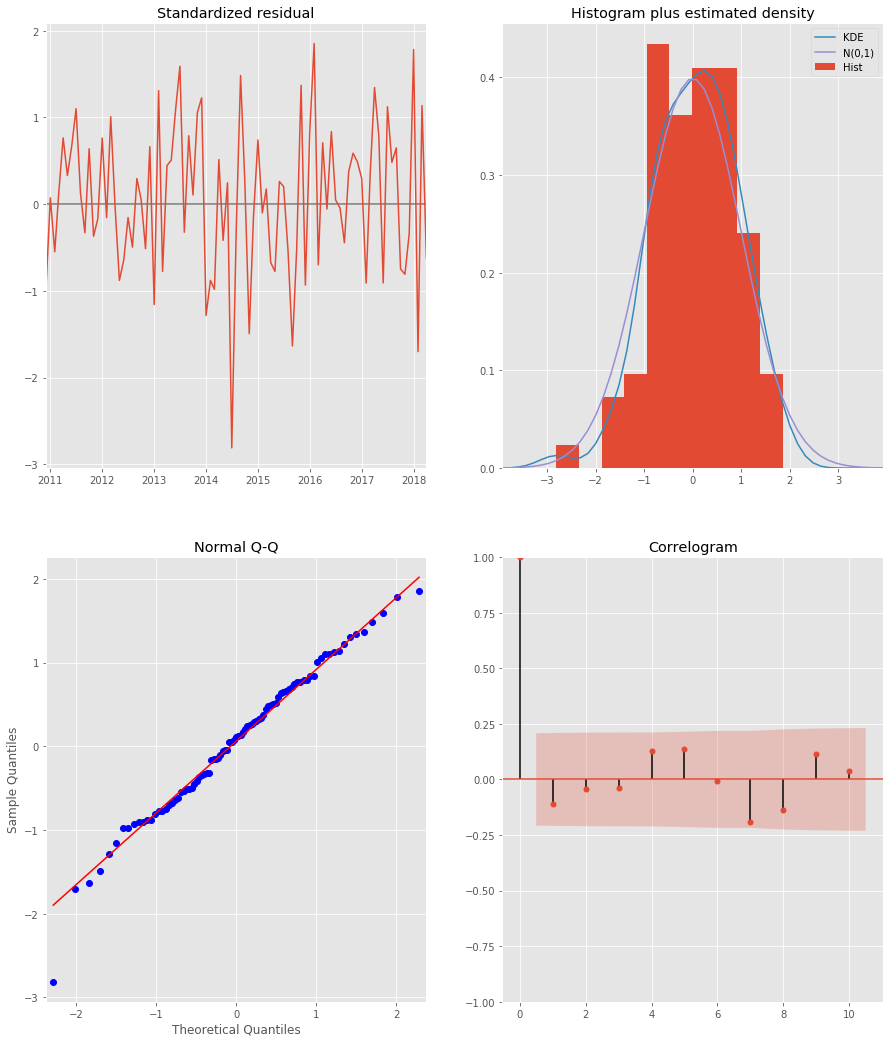

In [12]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

## One-step Ahead Forecasting

In [13]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_conf = pred.conf_int()

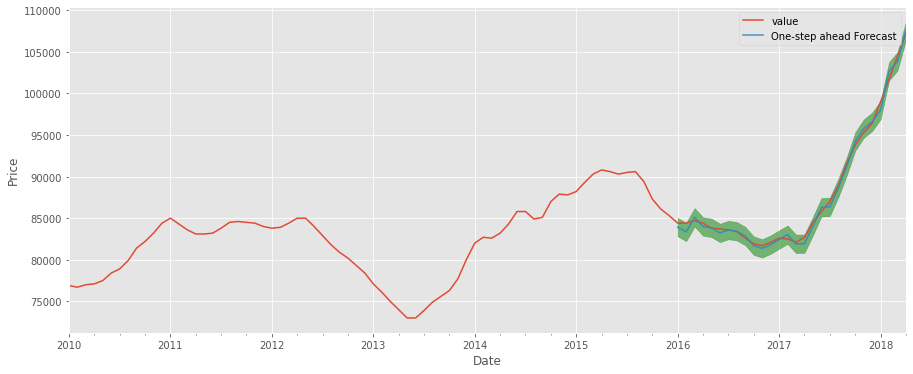

In [14]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = ts1['2010-01-01':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

In [81]:
# pred.predicted_mean

In [15]:
# Get the real and predicted values
ts1_forecasted = pred.predicted_mean
ts1_truth = ts1['2016-01-01':]
mse = mean_squared_error(ts1_truth, ts1_forecasted)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))




The Root Mean Squared Error of our forecasts is 501.27


## Dynamic Forecasting

In [16]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

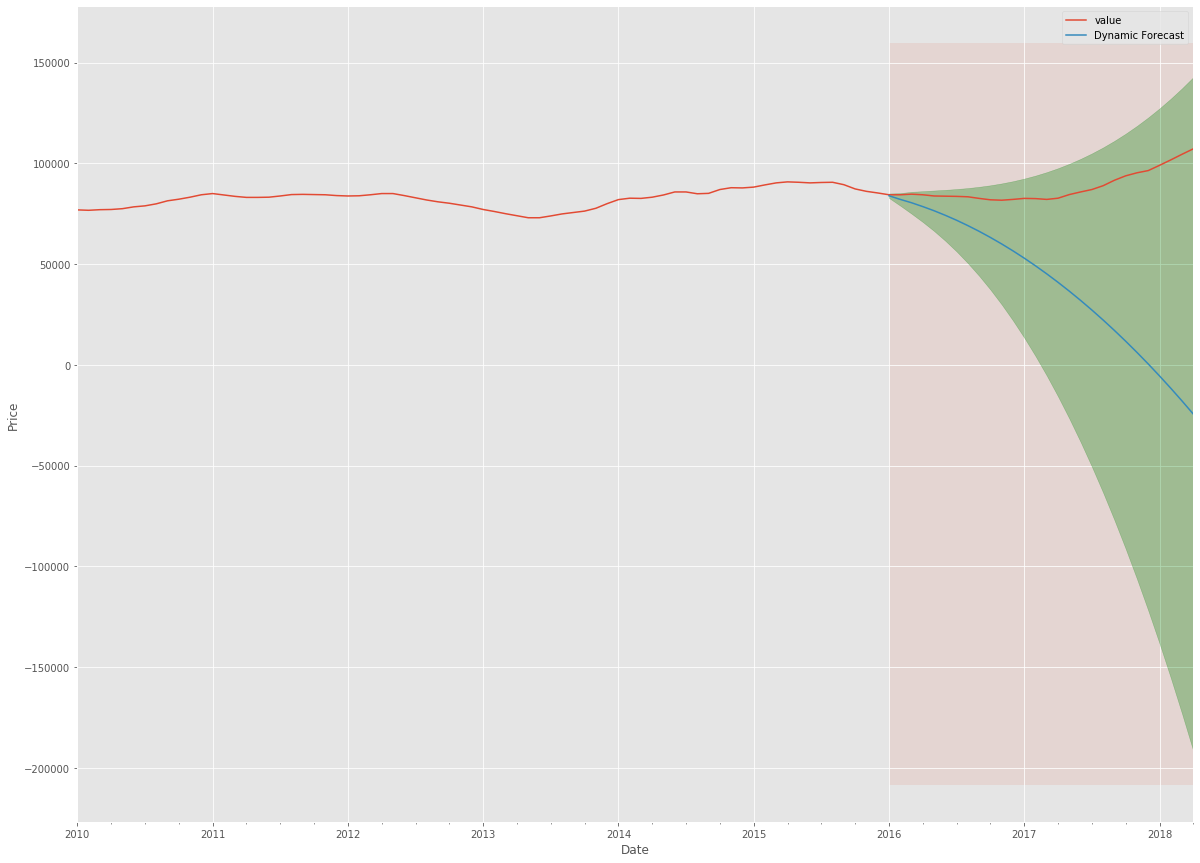

In [17]:
# Plot the dynamic forecast with confidence intervals.

ax = ts1['2010':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)


ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-01-01'), ts1_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [18]:
# Get the real and predicted values
ts1_forecasted = pred_dynamic.predicted_mean
ts1_truth = ts1['2016-01-01':]
mse = mean_squared_error(ts1_truth, ts1_forecasted)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 61553.75


In [18]:
print(mse)

1744505598.7767036


## Producing and visualising forecasts

In [20]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

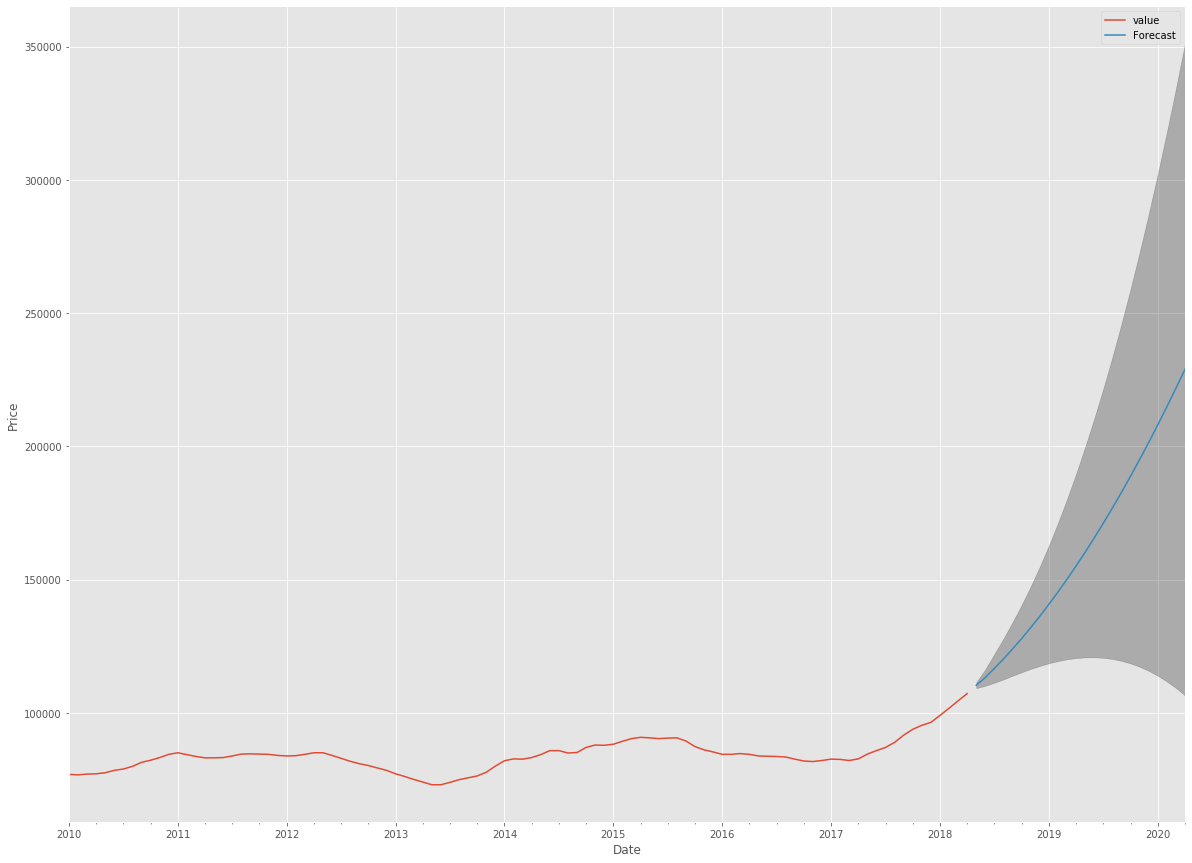

In [21]:
# Plot future predictions with confidence intervals
ax = ts1.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [22]:
# predicted value on Jan 1st 2020?
prediction.predicted_mean['2020-01-01']

207999.06919353586

In [23]:
# ROI
print((prediction.predicted_mean['2020-01-01']/ts1['2018-01'])-1)

               value
time                
2018-01-01  1.101001
